# Algorithm Performance Data Analysis - Run 2 V2

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 90 | 0 | 
| max | 130 | 0.001000 | 
| step| 1 | 0.000005 | 
| iteration | 41 | 201 | 

In [29]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_214258.csv')

In [16]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_214258,10404007.png,502730,101941,400789,0.797225,20,12,61265,13842,47423,0.774063,21.688852,2411.102096,14.308648,90,0.000000
1,2,test_20231101_214258,1254659.png,342646,149261,193385,0.564387,9,18,80080,19673,60407,0.754333,14.031650,1493.837936,16.387769,90,0.000000
2,3,test_20231101_214258,10188041.png,221231,20404,200827,0.907771,2,6,41731,2834,38897,0.932089,8.023445,552.168352,20.710088,90,0.000000
3,4,test_20231101_214258,10287332.png,216980,22494,194486,0.896331,2,4,22337,3027,19310,0.864485,8.336404,539.213328,20.813197,90,0.000000
4,5,test_20231101_214258,11610969.png,368720,72599,296121,0.803105,4,5,84111,10343,73768,0.877032,14.696811,1466.690005,16.467420,90,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81995,6,test_20231101_232650,10350842.png,212614,3019,209595,0.985801,1,5,42529,441,42088,0.989631,24.490901,3586.065931,12.584621,130,0.000995
81996,7,test_20231101_232650,10863862.png,317432,6969,310463,0.978046,2,5,66058,1024,65034,0.984498,36.437904,6694.791408,9.873433,130,0.000995
81997,8,test_20231101_232650,11382381.png,312486,359,312127,0.998851,2,5,46745,48,46697,0.998973,23.287735,2886.242320,13.527476,130,0.000995
81998,9,test_20231101_232650,11079715.png,443815,107529,336286,0.757717,7,7,124136,15092,109044,0.878424,18.001861,2370.582107,14.382254,130,0.000995


In [17]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000,82000.00000,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000,82000.000000
mean,5.500000,321053.700000,42622.763866,278430.936134,0.883778,2.46939,4.331256,60908.400000,5903.255329,55005.144671,0.920822,16.602556,1874.016435,15.897427,110.000000,0.000498
std,2.872299,92668.937908,50794.594164,74421.346797,0.119720,1.17091,1.454468,27852.527292,6933.639087,22231.375351,0.064488,4.891762,863.382548,2.158484,11.832232,0.000289
min,1.000000,212614.000000,156.000000,190923.000000,0.524507,1.00000,3.000000,22337.000000,22.000000,19310.000000,0.754333,8.023445,539.213328,9.873433,90.000000,0.000000
25%,3.000000,221231.000000,9126.500000,206860.000000,0.852593,2.00000,4.000000,41731.000000,1308.000000,39955.000000,0.878097,13.891163,1257.038496,14.268431,100.000000,0.000249
50%,5.500000,314959.000000,18776.000000,271032.000000,0.927578,2.00000,4.000000,54005.000000,2639.000000,47060.000000,0.938759,16.583107,1807.803259,15.559292,110.000000,0.000498
75%,8.000000,368720.000000,60871.000000,310742.000000,0.963323,3.00000,5.000000,80080.000000,8720.000000,65919.000000,0.971690,19.881477,2433.533259,17.137318,120.000000,0.000746
max,10.000000,502730.000000,211031.000000,487941.000000,0.999426,35.00000,68.000000,124136.000000,28735.000000,109044.000000,0.999451,36.437904,6694.791408,20.813197,130.000000,0.000995


## Analyze per Image

In [18]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [19]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_214258,10404007.png,502730,101941,400789,0.797225,20,12,61265,13842,47423,0.774063,21.688852,2411.102096,14.308648,90,0.000000
10,1,test_20231101_214259,10404007.png,502730,101941,400789,0.797225,4,5,61265,13842,47423,0.774063,21.688852,2411.102096,14.308648,90,0.000005
20,1,test_20231101_214300,10404007.png,502730,101941,400789,0.797225,4,4,61265,13842,47423,0.774063,21.688852,2411.102096,14.308648,90,0.000010
30,1,test_20231101_214301,10404007.png,502730,101941,400789,0.797225,4,4,61265,13842,47423,0.774063,21.688852,2411.102096,14.308648,90,0.000015
40,1,test_20231101_214301,10404007.png,502730,101941,400789,0.797225,3,4,61265,13842,47423,0.774063,21.688852,2411.102096,14.308648,90,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81950,1,test_20231101_232647,10404007.png,502730,16054,486676,0.968066,3,5,61265,2335,58930,0.961887,26.211972,3568.997280,12.605341,130,0.000975
81960,1,test_20231101_232648,10404007.png,502730,14789,487941,0.970583,3,5,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.000980
81970,1,test_20231101_232648,10404007.png,502730,14789,487941,0.970583,2,4,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.000985
81980,1,test_20231101_232649,10404007.png,502730,14789,487941,0.970583,3,4,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.000990


In [20]:
# # List of metrics interested in
# metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# # Create a separate plot for each metric
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
    
#     # Group by AllowedExceedingThresholdFactor and plot
#     for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
#         plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
#     plt.title(f'{image_name} - {metric}')
#     plt.xlabel('QuadtreeThreshold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.grid(True)
#     plt.show()


## Analyze per Test

In [21]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_57685/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [22]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231101_214258,90,0.000000,5.5,321053.7,65373.3,255680.4,0.821686,5.1,7.1,60908.4,8912.7,51995.7,0.876904,13.648028,1274.319665,17.483023
1,test_20231101_214259,90,0.000005,5.5,321053.7,65373.3,255680.4,0.821686,2.6,4.3,60908.4,8912.7,51995.7,0.876904,13.648028,1274.319665,17.483023
2,test_20231101_214300,90,0.000010,5.5,321053.7,65373.3,255680.4,0.821686,2.8,4.0,60908.4,8912.7,51995.7,0.876904,13.648028,1274.319665,17.483023
3,test_20231101_214301,90,0.000015,5.5,321053.7,65373.3,255680.4,0.821686,2.4,3.8,60908.4,8912.7,51995.7,0.876904,13.648028,1274.319665,17.483023
4,test_20231101_214301,90,0.000020,5.5,321053.7,65373.3,255680.4,0.821686,2.6,3.8,60908.4,8912.7,51995.7,0.876904,13.648028,1274.319665,17.483023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8195,test_20231101_232647,130,0.000975,5.5,321053.7,24033.4,297020.3,0.934972,2.8,7.4,60908.4,3400.5,57507.9,0.956294,21.294759,2992.584020,13.972316
8196,test_20231101_232648,130,0.000980,5.5,321053.7,23768.1,297285.6,0.935702,2.8,5.2,60908.4,3364.8,57543.6,0.956924,21.460160,3033.289519,13.907701
8197,test_20231101_232648,130,0.000985,5.5,321053.7,23768.1,297285.6,0.935702,2.1,4.5,60908.4,3364.8,57543.6,0.956924,21.460160,3033.289519,13.907701
8198,test_20231101_232649,130,0.000990,5.5,321053.7,23768.1,297285.6,0.935702,2.2,4.4,60908.4,3364.8,57543.6,0.956924,21.460160,3033.289519,13.907701


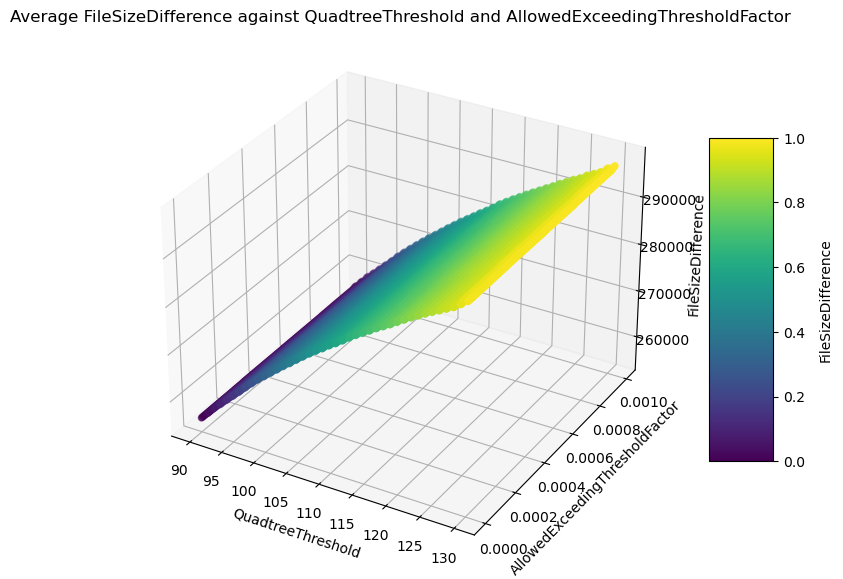

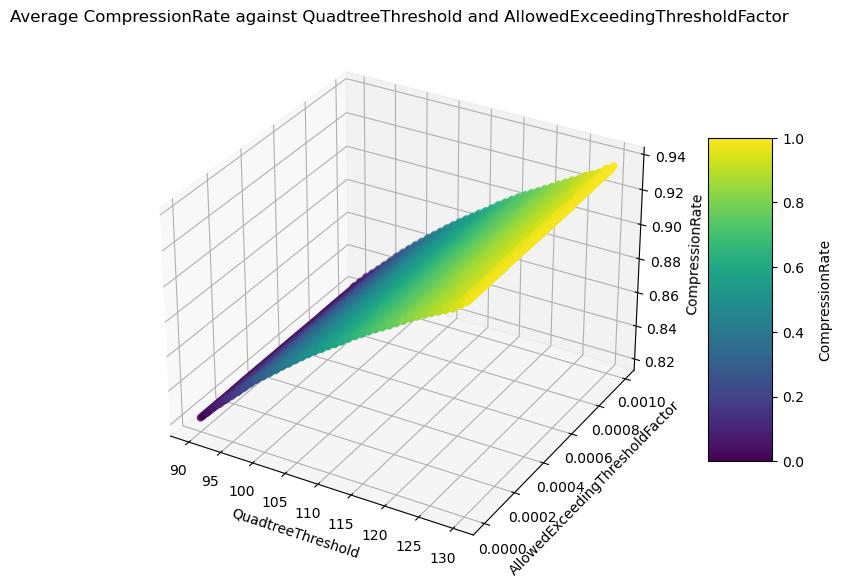

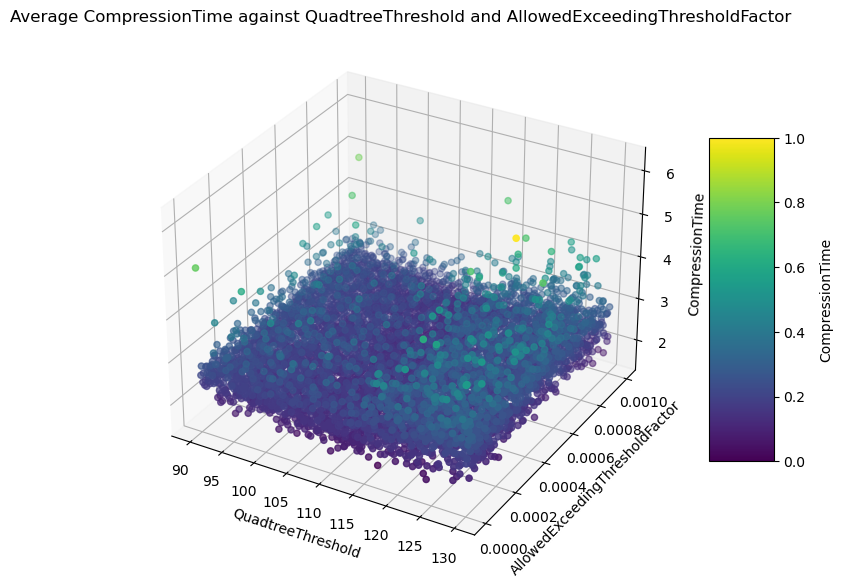

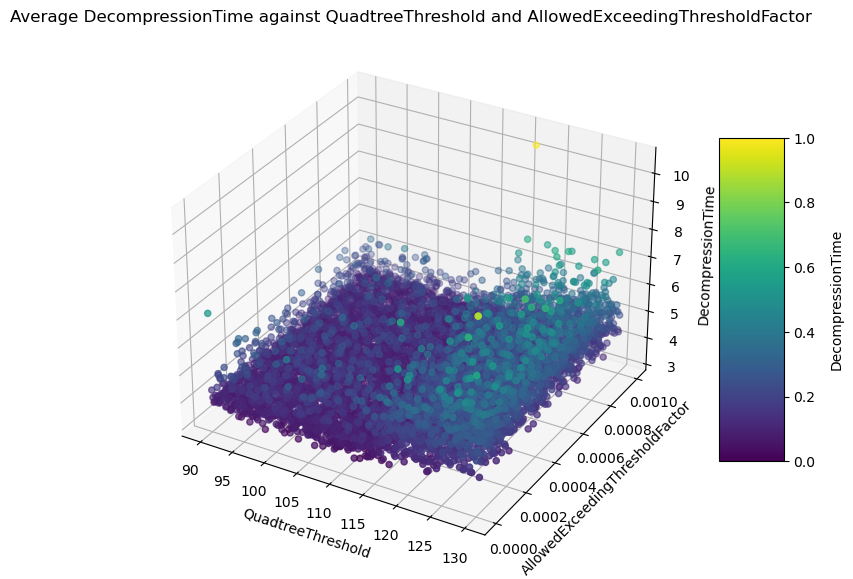

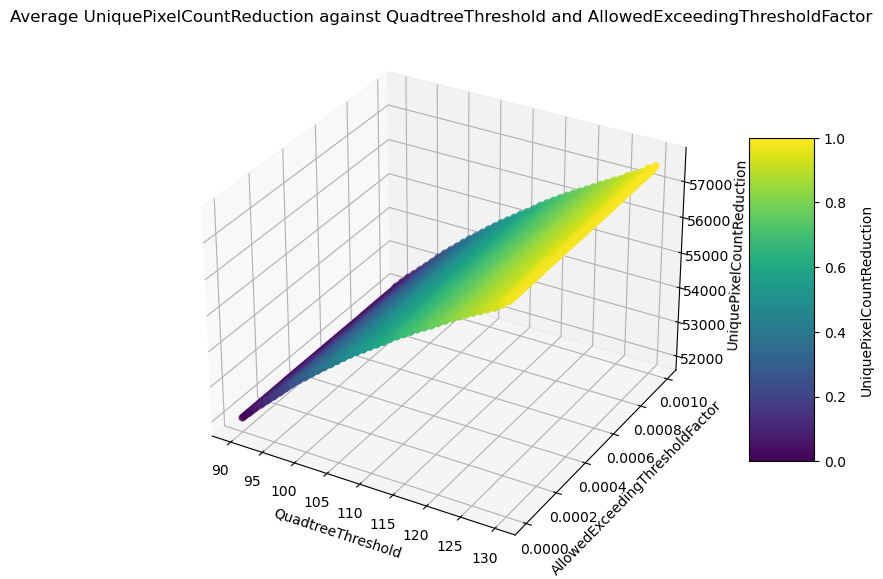

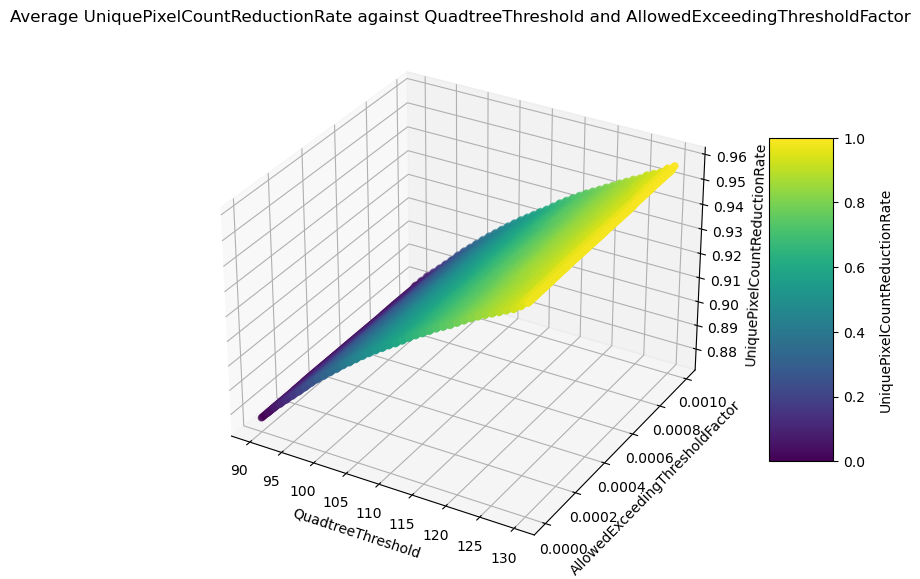

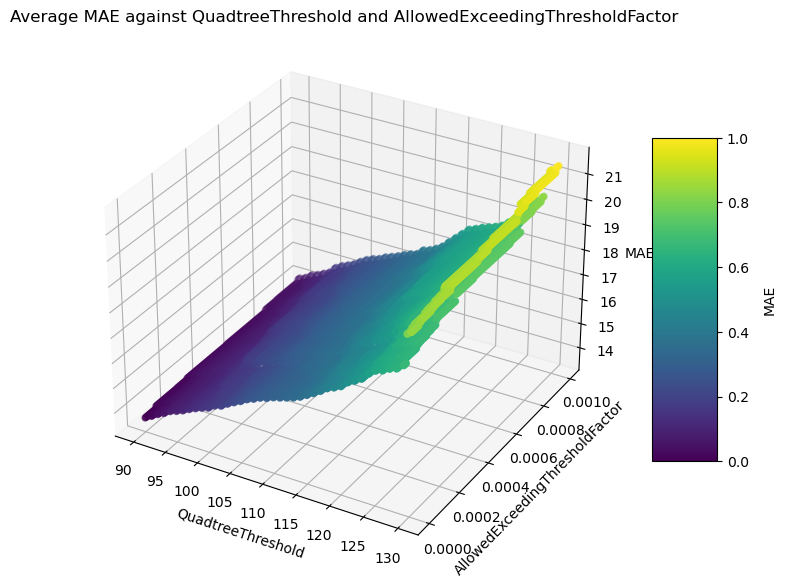

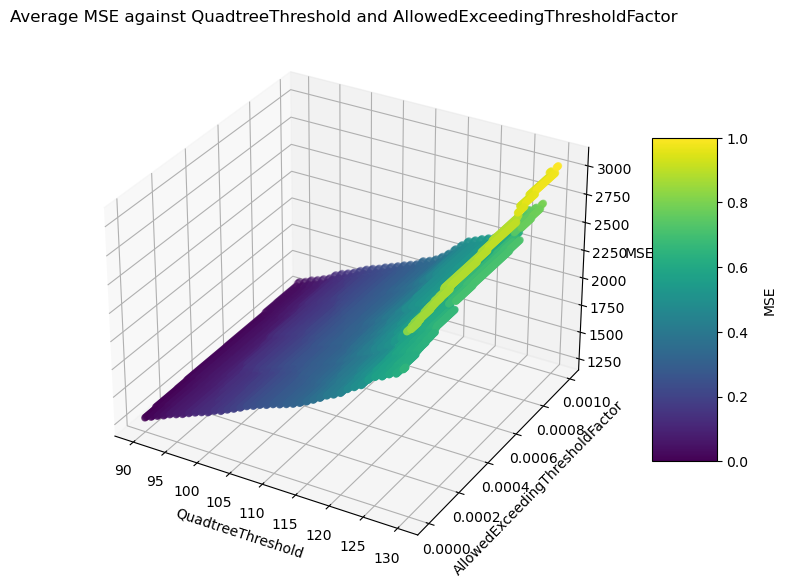

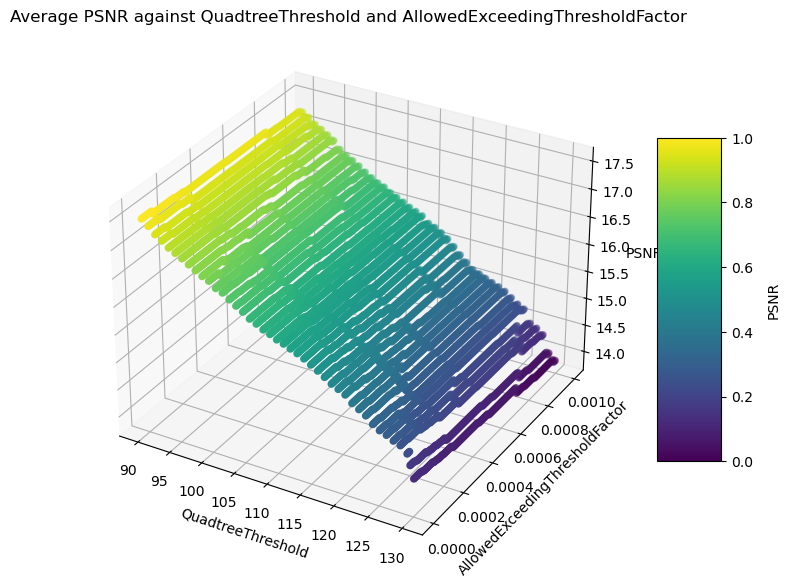

In [23]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


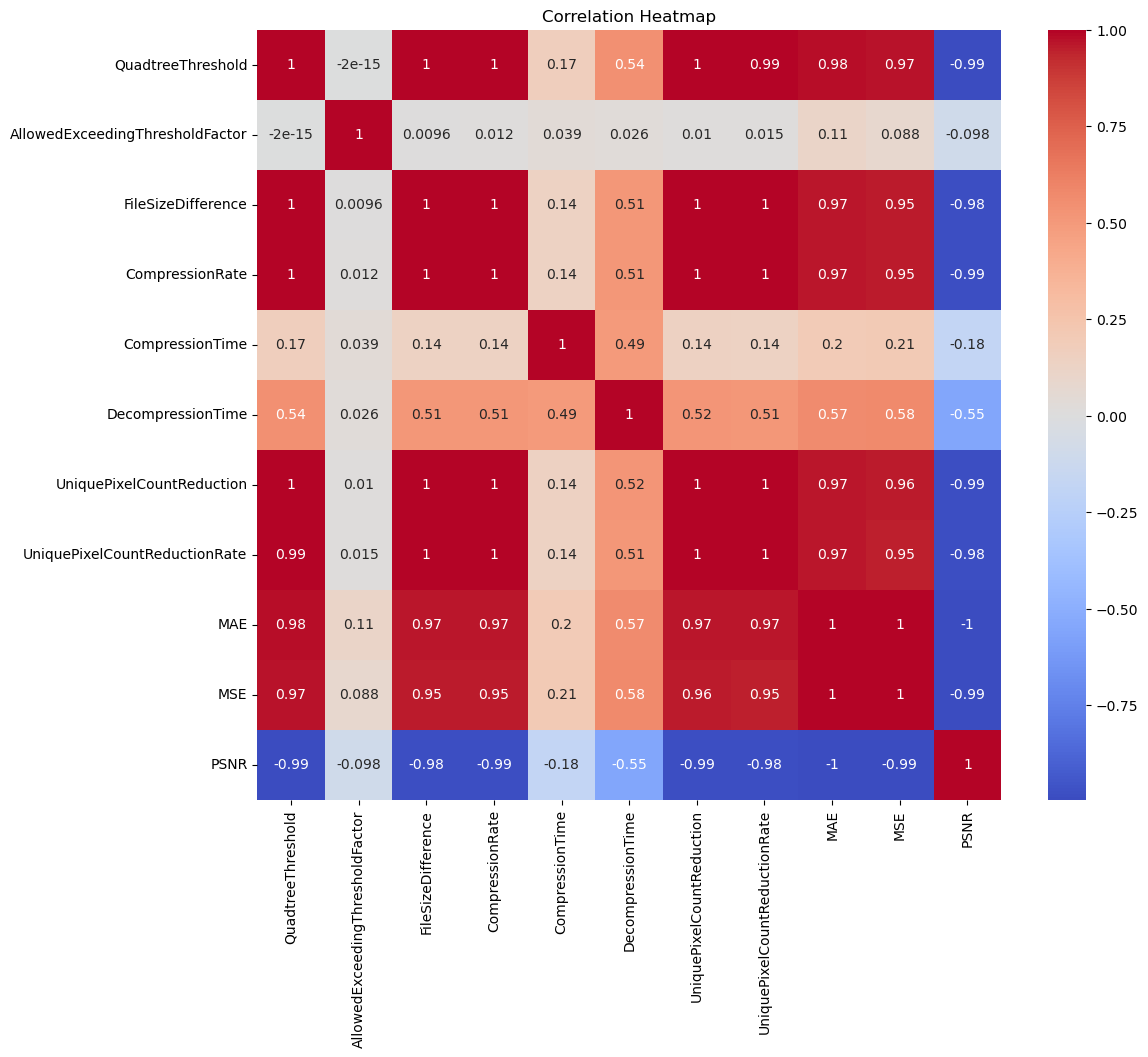

In [30]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [31]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

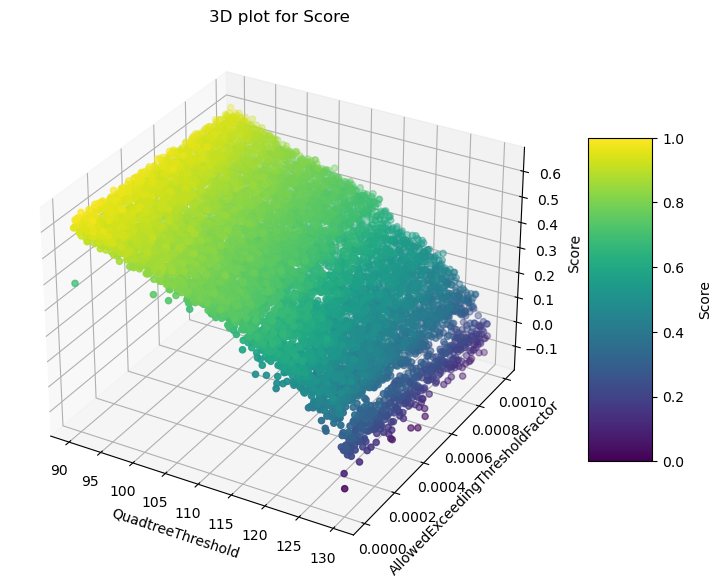

In [32]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

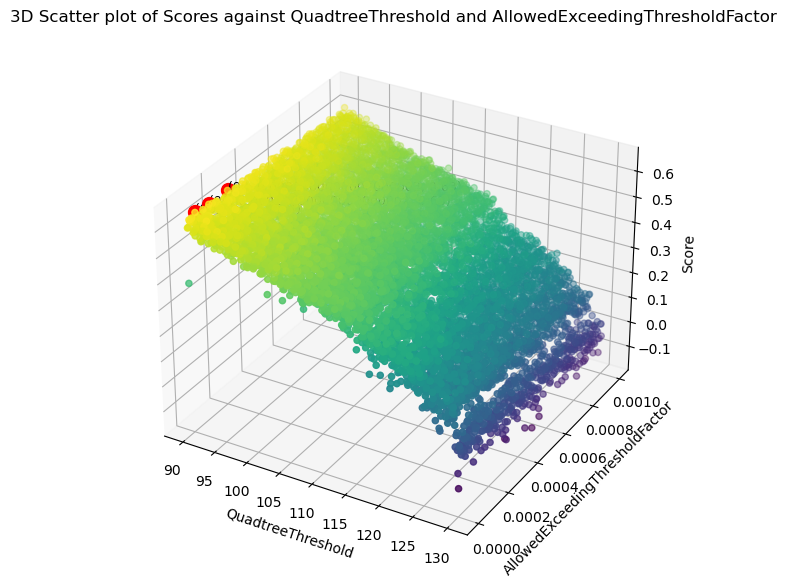

In [33]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [34]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


    QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
10                 90                          0.00005  0.635508
26                 90                          0.00013  0.627449
48                 90                          0.00024  0.627117
